In [1]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd
import hrv_functions

from multiprocessing import Pool, cpu_count
from tqdm.notebook import tqdm

pyhrv version : 0.4.1
biosppy version : 2.1.2
nk version : 0.2.7


In [2]:
raw = pd.read_csv('ecg_70.txt', sep = ' ').T
raw

,1,2,3,4,5,6,7,8,9,10,...,239991,239992,239993,239994,239995,239996,239997,239998,239999,240000
id1,0.794525,0.790710,0.785828,0.781708,0.776520,0.772095,0.767212,0.762329,0.757141,0.752411,...,1.750950,1.688230,1.624760,1.560060,1.494600,1.428530,1.362300,1.295780,1.230010,1.164400
id2,0.033112,0.032196,0.031433,0.030670,0.030060,0.029144,0.028381,0.027771,0.027466,0.026703,...,-0.015564,-0.015564,-0.015869,-0.016022,-0.016327,-0.017090,-0.017700,-0.017853,-0.018616,-0.019226
id3,0.039368,0.036316,0.033875,0.031738,0.030518,0.029602,0.029144,0.029297,0.030365,0.031281,...,0.131683,0.130920,0.130463,0.130005,0.129852,0.129700,0.129547,0.129700,0.129852,0.129395
id4,-0.361328,-0.355072,-0.348663,-0.342712,-0.336456,-0.330963,-0.325470,-0.320129,-0.315094,-0.310364,...,-0.195160,-0.194702,-0.193939,-0.193634,-0.192261,-0.191803,-0.191193,-0.190735,-0.189972,-0.189514
id5,-0.017853,-0.016937,-0.016480,-0.015869,-0.015411,-0.014954,-0.014496,-0.014343,-0.014343,-0.014038,...,0.103607,0.079346,0.055542,0.033417,0.011444,-0.009155,-0.029144,-0.048065,-0.066223,-0.082703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id69,0.095825,0.095825,0.095825,0.095673,0.095520,0.095215,0.095215,0.094910,0.094910,0.095062,...,0.083008,0.083618,0.083313,0.083771,0.083771,0.084228,0.084381,0.084686,0.084839,0.084839
id70,0.001526,0.002594,0.003662,0.004578,0.005798,0.006714,0.008240,0.009308,0.011139,0.012665,...,-0.070953,-0.088043,-0.103302,-0.116577,-0.128784,-0.139008,-0.148010,-0.155334,-0.161133,-0.166016
id71,-0.545654,-0.547791,-0.549164,-0.550690,-0.551758,-0.553131,-0.554047,-0.555115,-0.555878,-0.556793,...,0.080261,0.080414,0.080566,0.080566,0.080261,0.079803,0.079803,0.079651,0.079346,0.079346
id72,-0.001984,-0.003815,-0.004730,-0.006561,-0.007935,-0.009613,-0.011444,-0.013275,-0.014648,-0.016937,...,-0.074463,-0.074768,-0.074768,-0.074768,-0.074616,-0.074921,-0.074921,-0.074921,-0.075226,-0.075378


In [34]:

def main(raw):
    data = list(raw.iterrows())
    pbar = tqdm(total=len(data))
    
    def update(*a):
        pbar.update()
    
    with Pool(processes=cpu_count()) as pool:
        results = []
        for row in data:
            result = pool.apply_async(process_row, args=(row,), callback=update)
            results.append(result)
        
        time_list = [result.get() for result in results]

    pbar.close()
    
    return time_list




def process_row(row):
    ecg = row[1]
    time = hrv_functions.time_domain(ecg, 'nk', 'nk', 1000)
    return time
nk_nk = main(raw)

# def process_row(row):
#     ecg = row[1].tolist() 
#     time = hrv_functions.time_domain(ecg, 'nk', 'pyhrv', 1000)
#     return time
# nk_pyhrv = main(raw)

# def process_row(row):
#     ecg = row[1].tolist() 
#     time = hrv_functions.time_domain(ecg, 'biosppy', 'nk', 1000)
#     return time
# biosppy_nk = main(raw)

# def process_row(row):
#     ecg = row[1].tolist() 
#     time = hrv_functions.time_domain(ecg, 'biosppy', 'pyhrv', 1000)
#     return time
# biosppy_pyhrv = main(raw)


  0%|          | 0/70 [00:00<?, ?it/s]

In [43]:
hrv_functions.time_domain(raw.loc['id3'].tolist(), 'nk', 'nk', sampling_rate = 1000)

{'sdnn': 183.95991422063113,
 'rmssd': 183.32904532589382,
 'pnn50': 28.865979381443296}

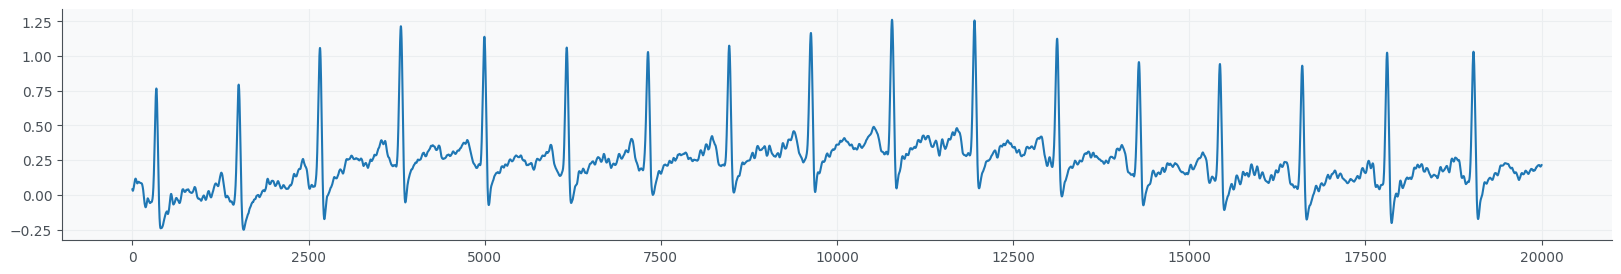

In [47]:
plt.figure(figsize = (20, 3))
plt.plot(raw.loc['id3'].tolist()[:20*1000])

In [28]:
pd.DataFrame(nk_pyhrv).describe().loc[['mean', 'std', '25%', '50%', '75%']]

,hr_mean,sdnn,rmssd,pnn50
mean,54.890029,252.896504,276.424781,52.030901
std,13.046581,156.843357,223.681368,29.033979
25%,45.917786,100.872082,75.863885,29.406743
50%,52.384135,247.901951,206.450576,57.951389
75%,60.633140,387.185039,452.311168,74.591918


In [27]:
pd.DataFrame(biosppy_nk).describe().loc[['mean', 'std', '25%', '50%', '75%']]

,sdnn,rmssd,pnn50
mean,117.544440,95.500570,40.029592
std,53.829971,73.101175,23.724385
25%,78.882372,49.556395,19.828125
50%,112.392058,74.695677,42.908676
75%,145.663696,121.659134,59.285390


In [26]:
pd.DataFrame(biosppy_pyhrv).describe().loc[['mean', 'std', '25%', '50%', '75%']]

,hr_mean,sdnn,rmssd,pnn50
mean,42.984967,117.544440,95.500570,40.289790
std,7.235834,53.829971,73.101175,23.913605
25%,38.013166,78.882372,49.556395,19.930806
50%,42.147419,112.392058,74.695677,43.200648
75%,48.349968,145.663696,121.659134,59.692329
